# Broadcasting

In these exercises, we'll practice using broadcasting to combine arrays of different dimensions.

In [2]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 7))

## Bezier Curves

A [Bezier Curve](https://en.wikipedia.org/wiki/B%C3%A9zier_curve) is way to define a two-dimensional curve in terms of a sequence of "control points". Intuitively, each control point "pulls" the path traced by the curve toward itself.

Mathematically, a bezier curve defines a function $B(t)$ from the interval $[0, 1]$ to a two-dimensional point $p$.

Here's an example of a fourth-order bezier curve. You can see that as t moves from 0 to 1, the control points exert different amounts of "force", pulling the final point closer toward themselves.

![images/bezier.gif](images/bezier.gif)

## Linear Bezier Curves

The simplest form of bezier curve is a "first-order" bezier curve with two control points $p_0$ and $p_1$.

The formula for first-order bezier curve is:

$B(t) = (1 - t)p_0 + tp_1$

The curve traced out by a first-order bezier curve is simply the line connecting $p_0$ and $p_1$. For any value of $t \in [0, 1]$, $B(t)$ evaluates to the point "t percent" of the way between $p_0$ and $p_1$.

**Exercise:** Implement a function that evaluates a Bezier curve **at a single point**. 

Your function should take the following arguments:

- `p0`, a length-2 array containing (x, y) coordinates of the first control point.
- `p1`, a length-2 array containing (x, y) coordinates of the second control point.
- `t`, a scalar value between 0 and 1.

In [8]:
def evaluate_linear_bezier_curve(p0, p1, t):
    firstterm=(1-t)*p0
    secondterm=t*p1
    
    return firstterm+secondterm

In [9]:
p0 = np.array([0, 0])
p1 = np.array([2, 1])

halfway = evaluate_linear_bezier_curve(p0, p1, 0.5)
three_quarters = evaluate_linear_bezier_curve(p0, p1, 0.75)

# If your implementation is correct, these assertions shouldn't trigger.
np.testing.assert_almost_equal(halfway, [1.0, 0.5])
np.testing.assert_almost_equal(three_quarters, [1.5, 0.75])

Implement a function that computes **an array of samples from a linear bezier curve**. Your function should take the following arguments:

- `p0`, a length-2 array containing (x, y) coordinates of the first control point. (Same as above.)
- `p1`, a length-2 array containing (x, y) coordinates of the second control point. (Same as above.)
- `ts`, a 1d array of unknown length containing sample values between 0 and 1.

Your function should return a `len(ts) x 2` array containing (x, y) coordinates of the requested samples.

Once you've think you have a solution, you can check your implementation by running `draw_linear_bezier_curve`, which will draw a bezier curve using samples generated by your `compute_linear_bezier_curve` function.

In [38]:
def draw_linear_bezier_curve(p0, p1):
    """You shouldn't need to change anything in this function.
    """
    ts = np.linspace(0, 1, 50)
    samples = compute_linear_bezier_curve(p0, p1, ts)
    X = samples[:, 0]
    Y = samples[:, 1]
    
    plt.plot(X, Y)
    plt.scatter([p0[0], p1[0]], [p0[1], p1[1]], color='red')
    plt.show()

'''The trick is to check their shapes once.The matrix of ts is basically a 50 row vector which needs
to be converted to a 50X1 vector for the elementwise multiplication to compute properly.Added the plt.show() 
For the graph to display in the above function.Newaxis basically adds the row/column dimension for a matrx of shape
(m,) or (,m)
'''

def compute_linear_bezier_curve(p0, p1, ts):
    
    ts=ts[:,np.newaxis]    
    firstterm=(1-ts)*p0
    secondterm=ts*p1
    
    return firstterm+secondterm
    

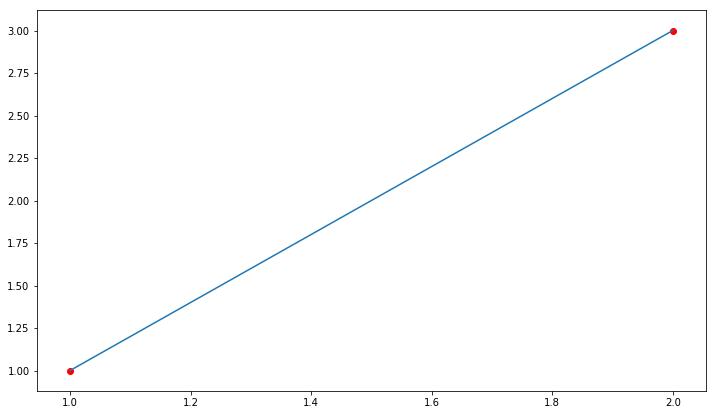

In [39]:
draw_linear_bezier_curve(np.array([1, 1]), np.array([2, 3]));

## Exercise: Quadratic Bezier Curve

The next-simplest form of Bezier Curve is a second-order (also known as "quadratic") curve. A second-order Bezier Curve has three control points, and can be implemented using the following formula:

$b(t) = (1 - t)^2p_0 + 2(1 - t)tp_1 + t^2p_2$

Implement a function with the same signature as above, but accept three control points, p0, p1, and p2. A correct implementation will draw a line that starts at $p0$, curves toward $p1$, and finishes at $p2$.

In [41]:
def draw_quadratic_bezier_curve(p0, p1, p2):
    """You shouldn't need to change anything in this function.
    """
    ts = np.linspace(0, 1, 50)
    samples = compute_quadratic_bezier_curve(p0, p1, p2, ts)
    
    X = samples[:, 0]
    Y = samples[:, 1]
    plt.plot(X, Y)
    
    points = np.vstack([p0, p1, p2])
    plt.scatter(points[:, 0], points[:, 1], color='red')
    plt.plot(points[:, 0], points[:, 1], linestyle='--', color='red')
    plt.show()
    
'''The trick is to check their shapes once.The matrix of ts is basically a 50 row vector which needs
to be converted to a 50X1 vector for the elementwise multiplication to compute properly.Added the plt.show() 
For the graph to display in the above function.Newaxis basically adds the row/column dimension for a matrx of shape
(m,) or (,m).The first step is the same as the previous solution.Rest is different
'''

def compute_quadratic_bezier_curve(p0, p1, p2, ts):
    ts=ts[:,np.newaxis]    
    firstterm=((1-ts)**2)*p0
    secondterm=(2*(1-ts))*(ts*p1)
    thirdterm=(ts**2)*p2
    
    return firstterm+secondterm+thirdterm

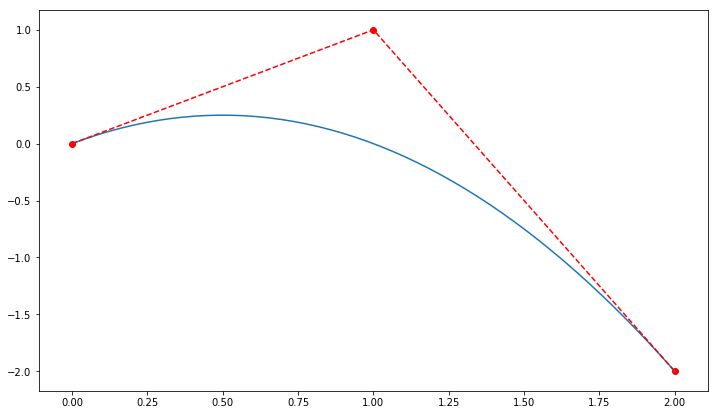

In [43]:
p0 = np.array([0, 0])
p1 = np.array([1, 1])
p2 = np.array([2, -2])
draw_quadratic_bezier_curve(p0, p1, p2)

## Exercise: Cubic Bezier Curve

A third-order (aka, cubic) Bezier Curve has four control points, and has the following formula:

$b(t) = (1 - t)^3p_0 + 3(1 - t)^2tp_1 + 3(1 - t)t^2p_2 + t^3p_3$

Implement an evaluator for a cubic bezier curve following the same pattern as above.

In [60]:
def draw_cubic_bezier_curve(p0, p1, p2, p3):
    """You shouldn't need to change anything in this function.
    """
    ts = np.linspace(0, 1, 50)
    samples = compute_cubic_bezier_curve(p0, p1, p2, p3, ts)
    X = samples[:, 0]
    Y = samples[:, 1]
    plt.plot(X, Y)
    
    points = np.vstack([p0, p1, p2, p3])
    plt.scatter(points[:, 0], points[:, 1], color='red')
    plt.plot(points[:, 0], points[:, 1], linestyle='--', color='red')
    plt.show()
    
'''The trick is to check their shapes once.The matrix of ts is basically a 50 row vector which needs
to be converted to a 50X1 vector for the elementwise multiplication to compute properly.Added the plt.show() 
For the graph to display in the above function.Newaxis basically adds the row/column dimension for a matrx of shape
(m,) or (,m).The first step is the same as the previous solution.Rest is different.Have made some small corrections to
the cubic bezier curve function call
'''
    
def compute_cubic_bezier_curve(p0, p1, p2, p3, ts):
    
    ts=ts[:,np.newaxis]    
    firstterm=((1-ts)**3)*p0
    secondterm=(3*(1-ts)**2)*(ts*p1)
    thirdterm=(3*(1-ts))*((ts**2)*p2)
    fourthterm=(ts**3)*p3
    
    return firstterm+secondterm+thirdterm+fourthterm

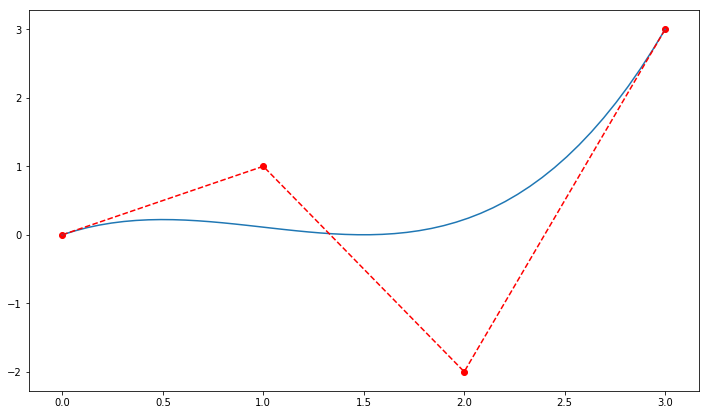

In [61]:
p0 = np.array([0, 0])
p1 = np.array([1, 1])
p2 = np.array([2, -2])
p3 = np.array([3, 3])
draw_cubic_bezier_curve(p0, p1, p2, p3)

## Exercise: Generalized Bezier Curve

You may have started to notice a pattern in the coefficients of each control point's contribution to the curve. We're getting [Binomial Coefficients](https://en.wikipedia.org/wiki/Binomial_coefficient)!

The general formula for a Bezier curve with $n$ control points is:

$b(t) = \sum_{i=0}^n \binom{n}{i}(1 - t)^{n - i}t^ip_i$

where $\binom{n}{i}$ is the binomial coefficient of $n$ and $i$.

Implement a function that computes samples from a generalized bezier curve. It should take a 2d array of (npoints x 2) and a 1d array of samples, and it should return a (len(t) x 2) array of evaluated samples. 

**Hint:** You can use `scipy.special.comb` to evaluate binomial coefficients.

**NOTE:** This exercise is hard. If you get stuck here, there's a solutions notebook nextdoor.

In [94]:
from scipy.special import comb

def draw_bezier_curve(points):
    ts = np.linspace(0, 1, 50)
    samples = compute_bezier_curve(points, ts)
    X = samples[:, 0]
    Y = samples[:, 1]
    plt.plot(X, Y)
    
    plt.scatter(points[:, 0], points[:, 1], color='red')
    plt.plot(points[:, 0], points[:, 1], linestyle='--', color='red')
    plt.show()

'''Tried to this using a for loop.Had to replace the for loop part with the numpy indexing'''

def compute_bezier_curve(points, t):
    
    n=len(points)-1
    i=np.arange(len(points))
    t=t[:,np.newaxis] 
        
    coefficients=comb(n,i)
    
    term=coefficients*(((1-t)**(n-i))*(t**i))
    
    return term @ points

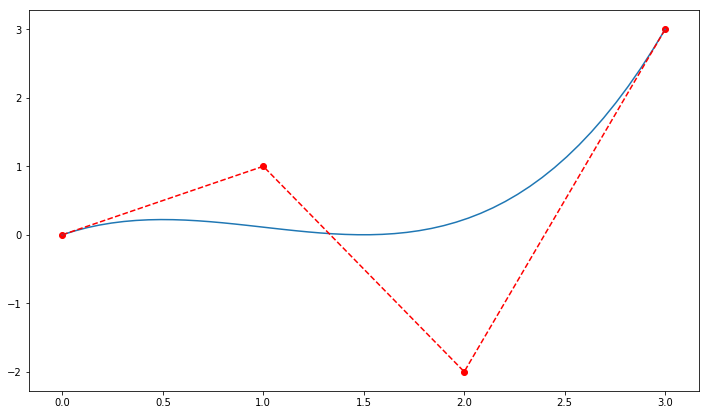

In [95]:
draw_bezier_curve(np.vstack([p0, p1, p2, p3]))

## Exercise: Estimate the Length of a Bezier Curve

Write a function that estimates the length of a bezier curve by computing an array of sample points and summing lengths of the differences between each successive point.

In [96]:
def estimate_curve_length(points, nsamples):
   # Generate sample points using the previously-defined function.
    samples = compute_bezier_curve(points, np.linspace(0, 1, nsamples))
    
    # Generate points representing the line segments between samples.
    deltas = np.diff(samples, axis=0)
    
    # Calculate the length of each line segment.
    lengths = np.sqrt((deltas ** 2).sum(axis=1))
    
    # Sum the lengths
    return lengths.sum()

In [97]:
estimate_curve_length([p0, p1, p2, p3], 5)

5.033940329994518

In [98]:
for i in range(3, 10):
    print(estimate_curve_length([p0, p1, p2, p3], i))

4.854101966249685
4.964603420827521
5.033940329994518
5.07353336566527
5.092520836611209
5.104771190900166
5.112373676140547
